[*********************100%***********************]  2 of 2 completed


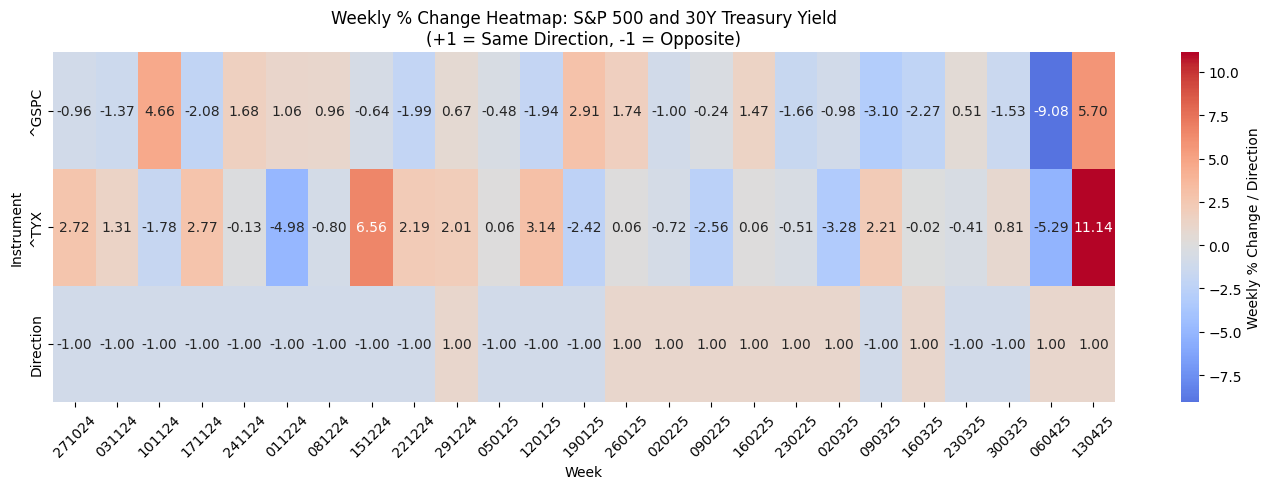

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define tickers
tickers = ['^GSPC', '^TYX']

# Download data
data = yf.download(tickers=tickers, period='6mo')

# Use 'Close' prices
close = data['Close'].dropna()

# Resample to weekly data
weekly_close = close.resample('W').last()

# Calculate weekly percentage change
weekly_pct_change = weekly_close.pct_change() * 100
weekly_pct_change = weekly_pct_change.dropna()

# Format index to DDMMYY
weekly_pct_change.index = weekly_pct_change.index.strftime('%d%m%y')

# Determine same or opposite direction
direction_match = (
    (weekly_pct_change['^GSPC'] * weekly_pct_change['^TYX']) > 0
).astype(int)  # True → 1 (same), False → 0

# Convert 0 to -1 for "opposite"
direction_match = direction_match.replace(0, -1)

# Add as a new row
heatmap_data = weekly_pct_change.T
heatmap_data.loc['Direction'] = direction_match.values

# Plot heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Weekly % Change / Direction'}
)
plt.title('Weekly % Change Heatmap: S&P 500 and 30Y Treasury Yield\n(+1 = Same Direction, -1 = Opposite)')
plt.xlabel('Week')
plt.ylabel('Instrument')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
from datetime import datetime, timedelta
import yfinance as yf
import plotly.express as px

# Define the ticker symbols and their corresponding names
tickers = {
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^IXIC': 'NASDAQ Composite',
    'BZ=F': 'Brent Crude Oil',
    '000001.SS': 'Shanghai Composite Index',
    '^N225': 'Nikkei 225',
    '^GDAXI': 'DAX',
    '^FTSE': 'FTSE 100',
    '^NSEI': 'NIFTY 50'
}

# Function to fetch data and plot heatmap
def fetch_and_plot_correlation(period):
    # Determine the start date based on the selected period
    end_date = datetime.now()
    if period == '1 Year':
        start_date = end_date - timedelta(days=365)
    elif period == '5 Years':
        start_date = end_date - timedelta(days=5*365)
    elif period == '10 Years':
        start_date = end_date - timedelta(days=10*365)
    
    # Fetch historical data
    data = yf.download(list(tickers.keys()), start=start_date, end=end_date)['Close']
    
    # Rename columns to equity names
    data.rename(columns=tickers, inplace=True)
    
    # Calculate the correlation matrix
    correlation_matrix = data.corr().round(2)
    
    # Plot the heatmap using Plotly
    fig = px.imshow(
        correlation_matrix, 
        text_auto=True, 
        aspect="auto", 
        color_continuous_scale='rdbu',
        labels={'color': 'Correlation Coefficient'},
        title=f'Correlation Matrix of Stock Markets and Brent Crude Oil Prices ({period} Data)',
        zmin=-1, zmax=1
    )
    
    # Update the hover template to display the correlation value rounded to 2 decimal places
    fig.update_traces(hovertemplate='Value: %{z:.2f}')
    
    fig.show()

fetch_and_plot_correlation('1 Year')

[*********************100%***********************]  9 of 9 completed


In [ ]:
import yfinance as yf
from datetime import datetime

# Define the end date (today)
end_date = datetime.now()

# Download the VIX and S&P 500 data from 2004 to today
vix_data = yf.download("^VIX", start='2004-01-01', end=end_date)
sp500_data = yf.download("^GSPC", start='2004-01-01', end=end_date)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
